This project was aided by the online version of Case Studies in Neural Data Analysis, by Mark Kramer and Uri Eden. Here is a link to the repository: https://mark-kramer.github.io/Case-Studies-Python/intro.html. I used the example data they provided to analyze here.

In [1]:
# Setup

from scipy.io import loadmat                                 
from pylab import *                
rcParams['figure.figsize']=(12,3) 

In [2]:
# Load data

data = loadmat('matfiles/02_EEG-1.mat')      # Data are 1 sec recordings @ 500 hz from a single electrode
data.keys()                                  # EEGa and EEGb are two different stimuli happening @ .25 sec

dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])

In [3]:
# Extract data

EEGa = data['EEGa']
print("EEGa shape = " + str(EEGa.shape))                     
EEGb = data['EEGb']
print("EEGb shape = " + str(EEGb.shape))     # EEGa and EEGb have same number of trials and samples
ntrials, nsamples = EEGa.shape               # setting variables with values for # trials (1000) and #samples (500)

t = data['t'][0]                             # t is extracted as vector rather than array
print("t shape = " + str(t.shape))           # 500 samples, 1 second, 500 hz - checks out

EEGa shape = (1000, 500)
EEGb shape = (1000, 500)
t shape = (500,)


In [4]:
# Defining a function to label plot title and axes

def LABELplot(title_str="Title"):
    '''x-axis: time secs
    y-axis: voltage muV
    title: input'''
    
    xlabel('Time [s]')          
    ylabel('Voltage [$/mu V$]') 
    title(title_str)         
    autoscale(tight=True)     

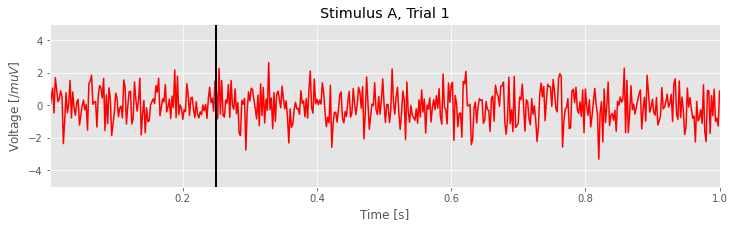

In [5]:
# Plot of first trial of Stimulus A

plot(t, EEGa[0], 'r')                              
LABELplot("Stimulus A, Trial 1")                     # title + axes

plot([0.25, 0.25], [-5,5], 'k', lw=2)              # black line represents stimulus presentation
savefig('imgs/A_trial1')

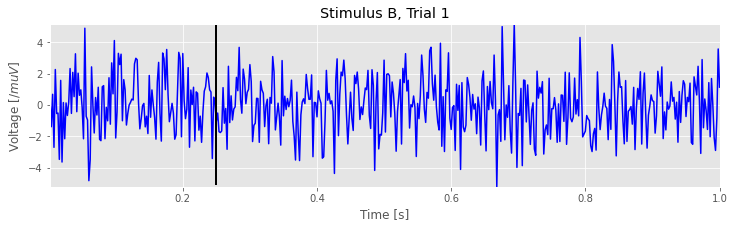

In [6]:
#Plot of first trial of Stimulus B

plot(t, EEGb[0], 'b')                                 
LABELplot('Stimulus B, Trial 1')  

plot([0.25, 0.25], [-5,5], 'k', lw=2)              
savefig('imgs/B_trial1')

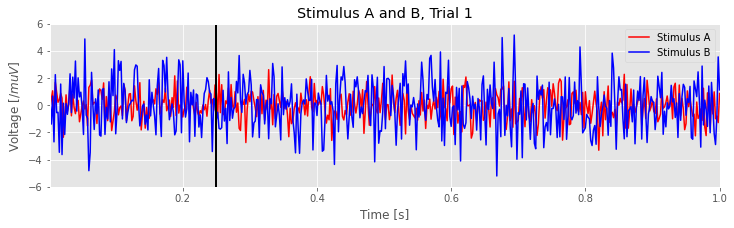

In [7]:
# Plot first trial of both A and B

plot(t,EEGa[0], 'r', label="Stimulus A")   
plot(t,EEGb[0], 'b', label="Stimulus B" )       
legend()

LABELplot('Stimulus A and B, Trial 1')   

plot([0.25, 0.25], [-6,6], 'k', lw=2) 
savefig('imgs/A_B_trial1')

# Plot first trial of both A and B

plot(t,EEGa[0], 'r', label="Stimulus A")   
plot(t,EEGb[0], 'b', label="Stimulus B" )       
legend()

LABELplot('Stimulus A and B, Trial 1')   

plot([0.25, 0.25], [-.5-(abs(max(EEGa and EEGb))),.5+(abs(max(EEGa and EEGb)))], 'k', lw=2) ###################################
#########################Trying to make the vertical line scale with the data so that i can create a new plot with it as a base

savefig('imgs/A_B_trial1')

C:\Users\sapph\AppData\Local\Temp\ipykernel_3248\4052214367.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar()


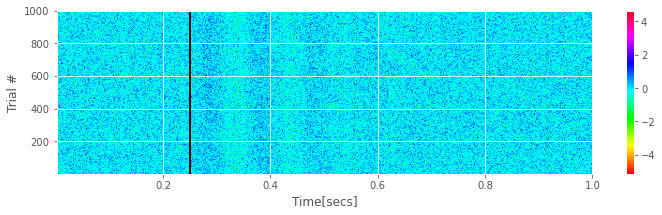

In [8]:
# Plot all trials of Simulus A

imshow(EEGa, cmap='hsv', extent=[t[0], t[-1], 1, ntrials], aspect='auto')
xlabel('Time[secs]')                             
ylabel('Trial #')
colorbar()  

vlines(0.25, 1, 1000, 'k', lw=2)            
savefig('imgs/A_all_trials')

C:\Users\sapph\AppData\Local\Temp\ipykernel_3248\2820069361.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar()


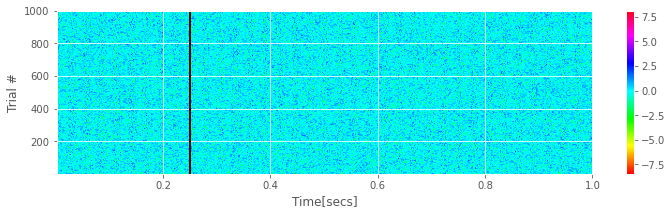

In [9]:
# Plot all trials of Simulus B

imshow(EEGb, cmap='hsv', extent=[t[0], t[-1], 1, ntrials], aspect='auto')
xlabel('Time[secs]')                             
ylabel('Trial #')
colorbar() 

vlines(0.25, 1, 1000, 'k', lw=2)            
savefig('B_all_trials')

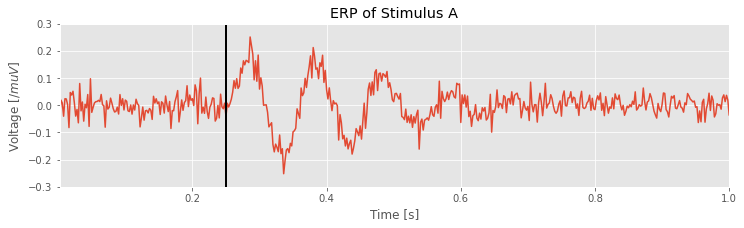

In [10]:
# Plot ERP of stimulus A by averaging all A trials
                                                     # Looks like your prototypical ERP
plot(t, EEGa.mean(0))        
LABELplot('ERP of Stimulus A') 

plot([0.25, 0.25], [-.3,.3], 'k', lw=2) 
savefig('imgs/ERP_A')

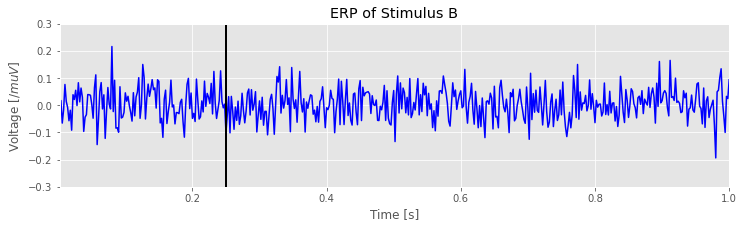

In [11]:
# Plot ERP of stimulus B by averaging all B trials
                                                     # Nothing interesting here. Seems like there's a difference between A and B
plot(t, EEGb.mean(0),'b')        
LABELplot('ERP of Stimulus B') 

plot([0.25, 0.25], [-.3,.3], 'k', lw=2) 
savefig('imgs/ERP_B')

Note to self: I can write a function from scratch to calculate ERPs and plot them using ERPplot()

In [12]:
# This is a function I wrote which plots an ERP from raw data using only data variable name and color as input
# I plan to use this to make a plot where I can superimpose multiple ERPs for the different stimuli


def ERPplot(data, color='k'):
    '''
    Input = data, color 
    data: array (time v voltage)
    color: ex. 'r', or 'b' (with apostrophes)
    t = time in secs    - vector already extracted (assumed for ERP data)
    plots the EEG data in specified color (default black)
    and same color confidence intervals

    '''
    mn = data.mean(0)
    sd = data.std(0)
    sdmn = sd / sqrt(ntrials)                       #need to figure out how to assign ntrials in this 
    
    plot(t, mn + 2 * sdmn, color+':', lw=1)              # upper CI
    plot(t, mn - 2 * sdmn, color+':', lw=1)              # lower CI
    
    plot(t, mn, color, lw=2, label=data)   
    
    hlines(0, t[0], t[-1], 'k')                     # highlight where voltage is 0

    LABELplot('ERP of Stimulus A + Confidence intervals')          
    savefig('imgs/ERPplot_homebrew_function')            

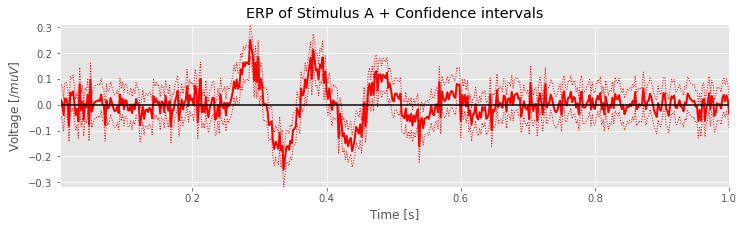

In [13]:
ERPplot(EEGa, 'r')

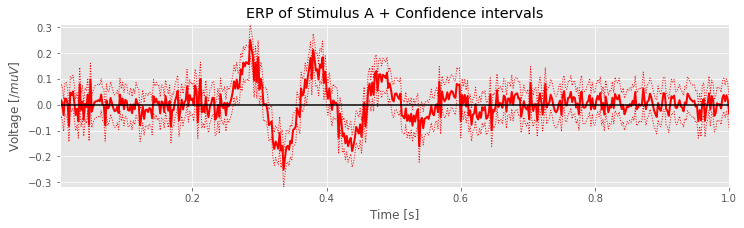

In [14]:
# Finding confidence intervals for stimulus A ERP

mn = EEGa.mean(0)
sd = EEGa.std(0)
sdmn = sd / sqrt(ntrials)                       # Confidence intervals from standard deviation of the estimate

plot(t, mn, 'r', lw=2) 
plot(t, mn + 2 * sdmn, 'r:', lw=1)              # upper CI
plot(t, mn - 2 * sdmn, 'r:', lw=1)              # lower CI

hlines(0, t[0], t[-1], 'k')                     # highlight where voltage is 0

LABELplot('ERP of Stimulus A + Confidence intervals')          
savefig('imgs/ERP_A_confint')            

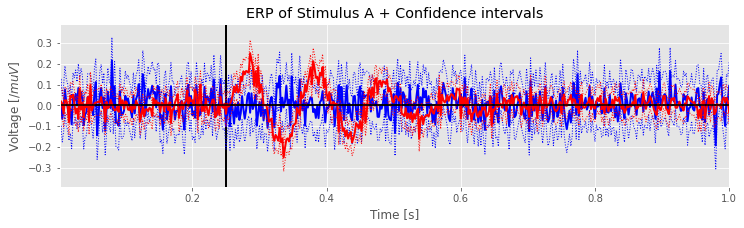

In [15]:
plot([0.25, 0.25], [-1.25*max(abs(mn + 2 * sdmn)), 1.25*max(abs(mn + 2 * sdmn))], 'k', lw=2) 
                                #creating an empty plot for ERPplots to plot onto. (only with stimulus marker)
                                #maybe i could write one (lw=0) for at t=0 instead of .25 (i could also make that a variable)

ERPplot(EEGb, 'b') 
ERPplot(EEGa, 'r')
#legend()   -------------Need to get this to work

Next will be calculating differenced ERP...